### A more advanced use of matplotlib

#### Contour lines and 3D plots

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

Let's start by defining a function $z=z(x,y)$, computed on a grid of $x$ and $y$ points:

In [165]:
# Number of points along the x and y axes 
npx=50
npy=50

# Limits of the domain along x and y 
xr=[-2,2]
yr=[-2,2]

# vectors of x and y variables
x=np.linspace(xr[0], xr[1], npx)
y=np.linspace(yr[0], yr[1], npy)

# definition of the grid
xg, yg=np.meshgrid(x,y)

# Total number of points of the grid
nxy=npx*npy

# Vectors of x and y varibles defined from the grid
# These vectors have length equal to nxy=npx*npy
xgl=xg.reshape(nxy)
ygl=yg.reshape(nxy)

# Function definition (polynomial of quartic order):
# 'c':  vector of the coefficients of the terms of 
#       the polynomial
# 'pw': vector of the powers

c=[0.2, 0.4, 1, -1.5, 0.5, 0, 0.2, -0.8]
pw=[(4,0), (0,4), (2,0), (0,2), (1,1), (1,0), (0,1), (0,0)]
lp=len(c)

def my_function(x,y):
    z=0.
    for ip in range(lp):
        z=z+c[ip]*x**pw[ip][0]*y**pw[ip][1]

    return z

# zgl is the 1D array of the z-values (same shape as xgl and ygl)
zgl=np.array([])
for jx, jy in zip(xgl, ygl):
    iz=my_function(jx, jy)
    zgl=np.append(zgl, iz)

# zg is the 2D array of the z-values (same shape of xg and yg)    
zg=zgl.reshape(npx, npy)

Let's plot the grid... 

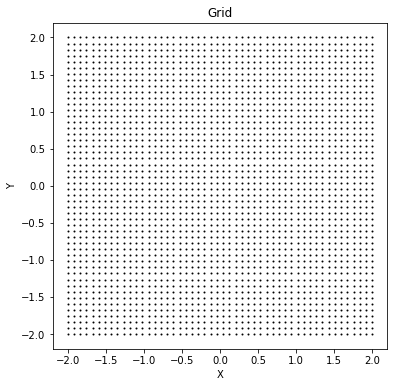

In [171]:
plt.figure(figsize=(6,6))
plt.scatter(xg,yg,s=1,color='k')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Grid")
plt.show()

Now, let's produce the 3D scatter-plot of the function: 

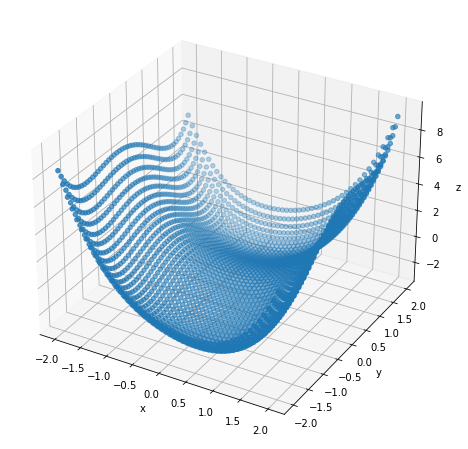

In [172]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(xgl, ygl, zgl)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Change view of the scatter-plot above:

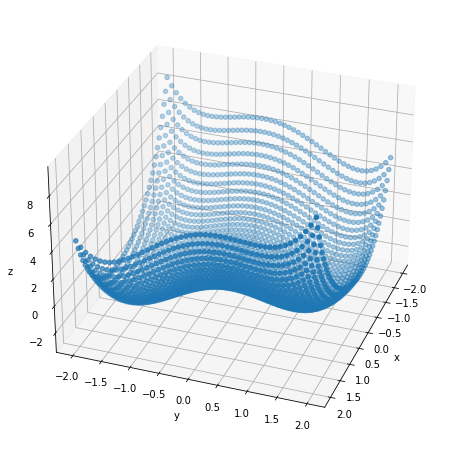

In [173]:
ax.view_init(30, 20)
fig

The following is a *surface* representation:

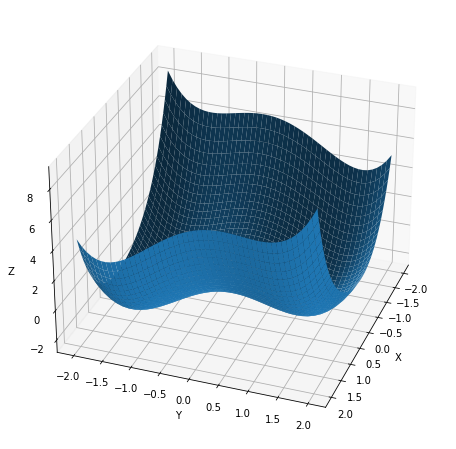

In [174]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(xg, yg, zg)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(30,20)
plt.show()


Now we plot a 3D representation of contour levels

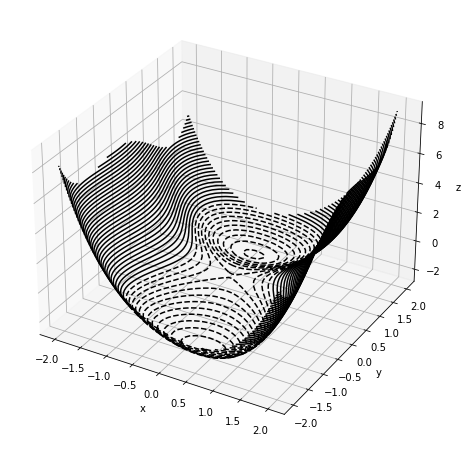

In [175]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.contour3D(xg, yg, zg, 60, colors='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Here is a 2D representation of the contour levels

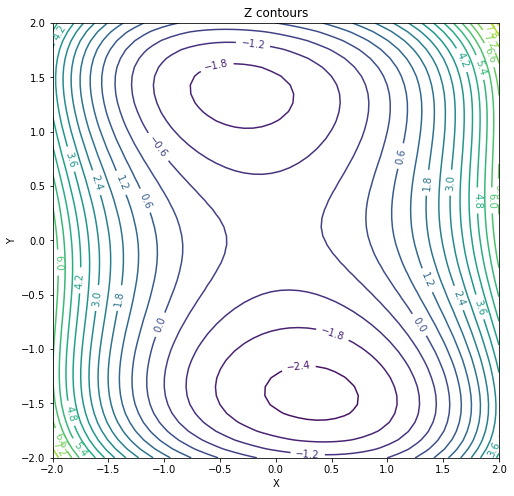

In [177]:
plt.figure(figsize=(8,8))
con=plt.contour(xg,yg,zg,20)
plt.clabel(con, inline=1, fontsize=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Z contours")
plt.show()


Now, we extract two particular contour levels, we could be interested in:

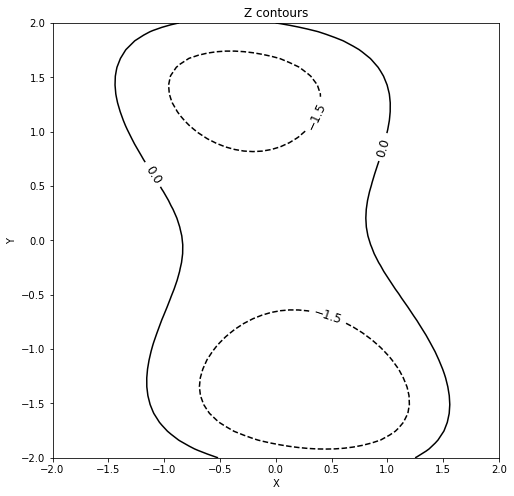

In [178]:
# List of values of the levels we want to plot
level=[-1.5, 0]

plt.figure(figsize=(8,8))
con=plt.contour(xg,yg,zg,level, colors='k')
plt.clabel(con, inline=1, fontsize=12)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Z contours")
plt.show()


Suppose we are interested in the *path*, in the space of the *x* and *y* variables, where the function assumes a value corresponding to one of the contour levels extracted above. Here is an appropriate function:

In [179]:
def extract_values(lev):
    p_total=con.collections[lev].get_paths()
    lev_size=len(p_total)
    lev_title="Level "+str(lev)+";    Value = "+str(level[lev]) 

    plt.figure(figsize=(6,6))
    path=np.array([])
    for ip in range(lev_size):
        p=con.collections[lev].get_paths()[ip]
        ipath=p.vertices
        xx=ipath[:,0]
        yy=ipath[:,1]
        plt.plot(xx,yy,"k.")
        path=np.append(path, ipath)
        lpath=len(path)
        path=path.reshape(int(lpath/2),2)
    
    plt.xlim(xr[0],xr[1])
    plt.ylim(yr[0],yr[1])
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(lev_title)
    plt.show()
    
    return path

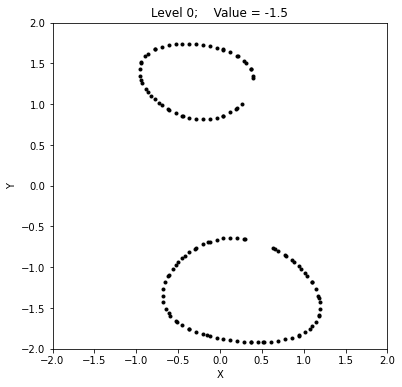

In [180]:
values = extract_values(0)

In [181]:
nrow=10
print("  X       Y      Z\n")
for iv in range(nrow):
    x, y=values[iv][0], values[iv,1]
    z=my_function(x, y)
    print("%5.2f  %5.2f  %5.2f" % (x,y,z))

  X       Y      Z

 0.63  -0.76  -1.50
 0.65  -0.78  -1.50
 0.69  -0.80  -1.50
 0.78  -0.85  -1.50
 0.79  -0.86  -1.50
 0.86  -0.91  -1.50
 0.89  -0.94  -1.50
 0.94  -0.98  -1.50
 0.97  -1.02  -1.50
 1.02  -1.07  -1.50
